# Climate - MALIN HEAD
---
In this notebook I will check the meteorological conditions collected in the Malin Head station, in Donegal County, Ireland. This information was collected through Met Éireann in the following link
https://cli.fusio.net/cli/climate_data/webdata/hly1575.zip

I put the download contents in this repository in the csv folder.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Name of the file.
FILENAME = "hly1575.csv"

# Path to the file.
DATADIR = "./csv/"

# Identify the file.
logFilename = DATADIR + FILENAME

# Load the csv.
df = pd.read_csv(logFilename, skiprows=23)

# Check the first 3 rows.
df

C:\Users\amand\AppData\Local\Temp\ipykernel_23652\4200089125.py:11: DtypeWarning: Columns (2,6,7,8,9,12,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(logFilename, skiprows=23)


,date,ind,rain,ind.1,temp,ind.2,wetb,dewpt,vappr,rhum,...,ind.3,wdsp,ind.4,wddir,ww,w,sun,vis,clht,clamt
0,01-may-1955 01:00,0,0.0,0,8.5,0,7.2,5.5,9.1,83,...,0,11,0,130,3,2,0.0,30000,40,7
1,01-may-1955 02:00,0,0.0,0,8.2,0,7.2,6.1,9.3,85,...,0,11,0,120,1,2,0.0,30000,100,6
2,01-may-1955 03:00,3,0.0,0,7.3,0,6.6,5.5,9.3,91,...,0,8,0,120,1,2,0.0,30000,220,5
3,01-may-1955 04:00,3,0.0,0,7.8,0,7.2,6.1,9.6,91,...,0,18,0,130,3,2,0.0,30000,90,7
4,01-may-1955 05:00,0,0.0,0,8.1,0,7.3,6.6,9.7,89,...,0,9,0,110,2,2,0.0,40000,90,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609283,31-oct-2024 20:00,0,0.0,0,11.9,0,11.2,10.6,12.7,91,...,2,12,2,200,,,,,,
609284,31-oct-2024 21:00,0,0.0,0,11.8,0,11.1,10.4,12.6,91,...,2,13,2,210,,,,,,
609285,31-oct-2024 22:00,0,0.0,0,12.1,0,11.3,10.6,12.8,90,...,2,13,2,220,,,,,,
609286,31-oct-2024 23:00,0,0.0,0,12.0,0,11.3,10.6,12.8,90,...,2,14,2,220,,,,,,


In [3]:
# Check variable types.
df.dtypes

date      object
ind        int64
rain      object
ind.1      int64
temp     float64
ind.2      int64
wetb      object
dewpt     object
vappr     object
rhum      object
msl      float64
ind.3      int64
wdsp      object
ind.4      int64
wddir     object
ww        object
w         object
sun       object
vis       object
clht      object
clamt     object
dtype: object

In [4]:
# Check if there are any missing values in the data set.
#df.isnull().sum() # There aren't any missing values

In [5]:
# Check if there are any empty values.
df.eq(" ").sum()

date          0
ind           0
rain          3
ind.1         0
temp          0
ind.2         0
wetb          6
dewpt         6
vappr         6
rhum          6
msl           0
ind.3         0
wdsp         52
ind.4         0
wddir       106
ww       130148
w        130148
sun      130032
vis      130228
clht     130172
clamt    130172
dtype: int64

In [6]:
# check if there are "0" values.
df.eq(0).sum()

date          0
ind      488318
rain     442062
ind.1    607604
temp        276
ind.2    605431
wetb        761
dewpt      7339
vappr         0
rhum          0
msl           0
ind.3    173882
wdsp       3280
ind.4    173883
wddir      3229
ww            1
w         36843
sun      347857
vis           0
clht         22
clamt      6723
dtype: int64

The minimum wind speed necessary to produce energy is 8-12 miles per hour

Wind turbines typically start operating at wind speeds around Beaufort Force 3 (or 8-12 miles per hour (mph)). Turbines reach maximum power output at Beaufort 5 (25-30 mph). At very high wind speeds, i.e. Beaufort Storm Force 10 winds, (55 mph) or greater the wind turbines shut down to prevent excessive wear and tear.

http://www.iwea.ie/index.cfm/page/technicalfaqs?#q29
https://www.met.ie/forecasts/marine-inland-lakes/beaufort-scale

wdsp starts > 7
wdsp max production = 21
wdsp stop > 48

In [7]:
#  Use datetime to treat the column "date" as datetime object.
df["date"]= pd.to_datetime(df["date"], format="%d-%b-%Y %H:%M")

In [8]:
days= df["date"].dt.strftime("%Y-%m-%d")
months= df["date"].dt.strftime("%Y-%m")
# year= df["date"].dt.strftime("%Y")

In [9]:
# New data frame with date and wind speed.
dfws=df[["date","wdsp"]]

# Drop the empty values.
dfws = dfws[dfws["wdsp"] != " "]
dfws = dfws[dfws["wdsp"] != 0]

dfws

,date,wdsp
0,1955-05-01 01:00:00,11
1,1955-05-01 02:00:00,11
2,1955-05-01 03:00:00,8
3,1955-05-01 04:00:00,18
4,1955-05-01 05:00:00,9
...,...,...
609283,2024-10-31 20:00:00,12
609284,2024-10-31 21:00:00,13
609285,2024-10-31 22:00:00,13
609286,2024-10-31 23:00:00,14


In [10]:
# Change the "wdsp" type from object to int.
dfws["wdsp"] = pd.to_numeric(dfws["wdsp"], errors="coerce")

# Drop the "0" values
dfws = dfws[dfws["wdsp"] != 0]

In [11]:
# Import Matplotlib and Seaborn libraries.
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Calculate the daily wind speed mean.
daily_mean_wind = dfws.groupby(days)["wdsp"].transform("mean")

# Create a new column.
dfws["daily_mean_wind"] = daily_mean_wind

# Check
dfws.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_23652\3023844052.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfws["daily_mean_wind"] = daily_mean_wind


,date,wdsp,daily_mean_wind
0,1955-05-01 01:00:00,11,19.434783
1,1955-05-01 02:00:00,11,19.434783
2,1955-05-01 03:00:00,8,19.434783


In [13]:
# Set the size of the figure.
plt.rcParams["figure.figsize"] = (20, 10)

# Define the grid parameters to use in the plots.
def grid():
    plt.minorticks_on() # Minor ticks between the main ticks.
    plt.grid(which="both", linestyle="--") # Configure the grid lines.
    plt.axhline(y = 7, color = 'r', linestyle = '-')
    plt.axhline(y = 28, color = 'g', linestyle = ':')
    plt.annotate("MIN", xy=(-6000, 7), xycoords='data', xytext=(0, -30), textcoords='offset points', size=10, 
             bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=-90,rad=10"))
    plt.annotate("Optimal", xy=(-6000, 28), xycoords='data', xytext=(0, 30), textcoords='offset points', 
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc,angleA=0,armA=45,rad=10"))

<Axes: title={'center': 'Daily mean wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

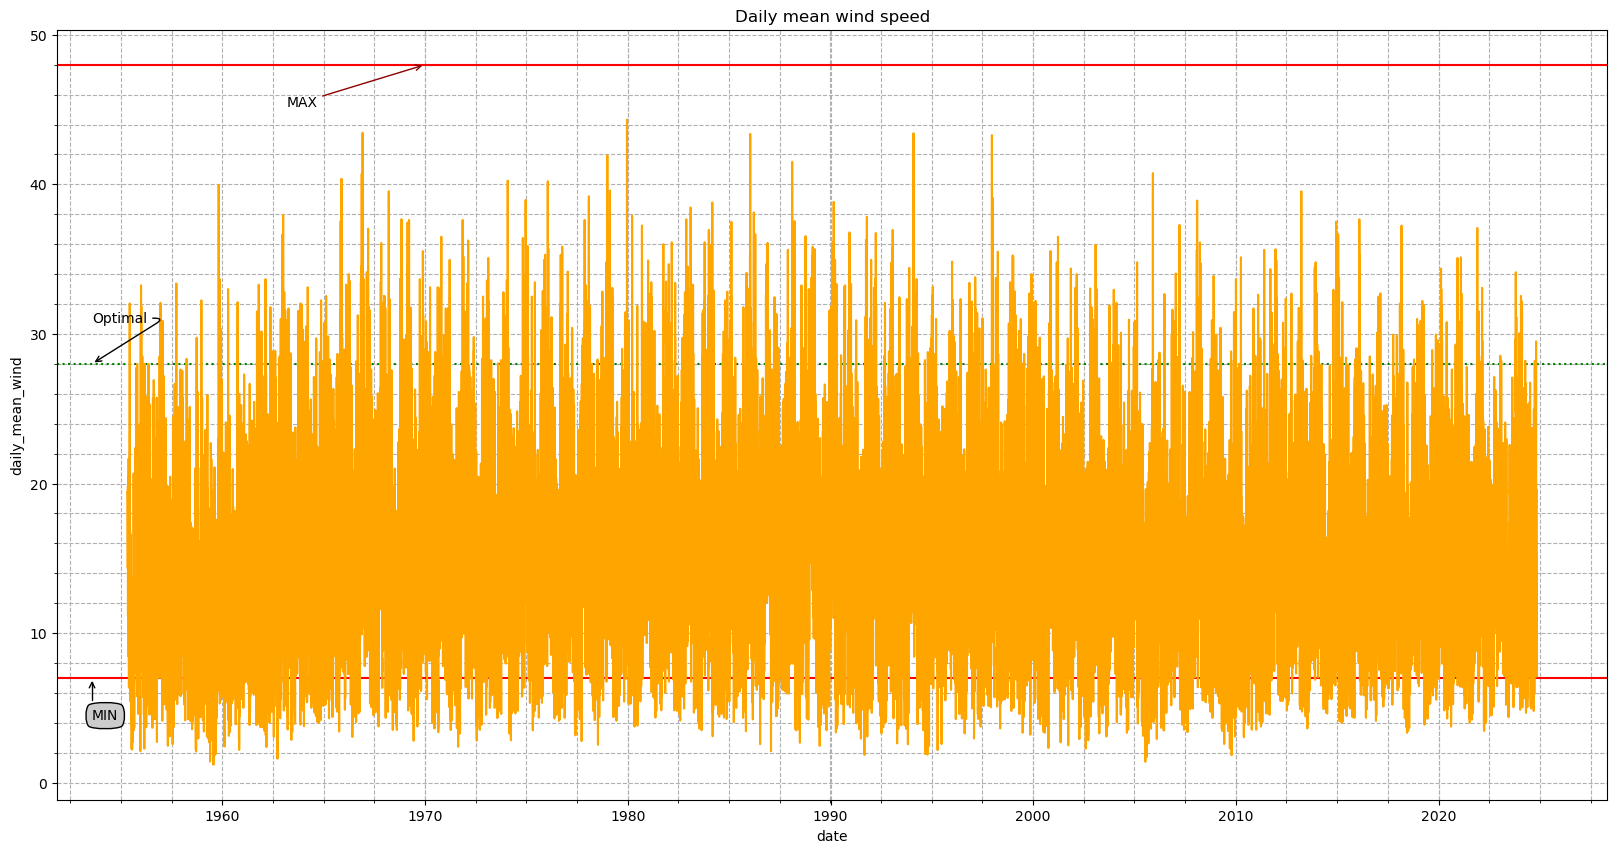

In [14]:
plt.axhline(y = 48, color = 'r', linestyle = '-')

plt.annotate("MAX", xy=(0,48), xytext=(-100, -30), textcoords='offset points', arrowprops=dict(arrowstyle='->', color='darkred'))
grid()
plt.title("Daily mean wind speed")
sns.lineplot(data=dfws, x="date", y="daily_mean_wind", color="orange")

# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axhline.html
# https://www.geeksforgeeks.org/plot-a-horizontal-line-in-matplotlib/
# https://matplotlib.org/stable/gallery/text_labels_and_annotations/annotation_demo.html

In [15]:
# Calculate the daily wind speed mean.
monthly_mean_wind = dfws.groupby(months)["wdsp"].transform("mean")

# Create a new column.
dfws["monthly_mean_wind"] = monthly_mean_wind

# Check
dfws.head(3)

C:\Users\amand\AppData\Local\Temp\ipykernel_23652\2397496332.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfws["monthly_mean_wind"] = monthly_mean_wind


,date,wdsp,daily_mean_wind,monthly_mean_wind
0,1955-05-01 01:00:00,11,19.434783,14.651351
1,1955-05-01 02:00:00,11,19.434783,14.651351
2,1955-05-01 03:00:00,8,19.434783,14.651351


<Axes: title={'center': 'Monthly mean wind speed'}, xlabel='date', ylabel='monthly_mean_wind'>

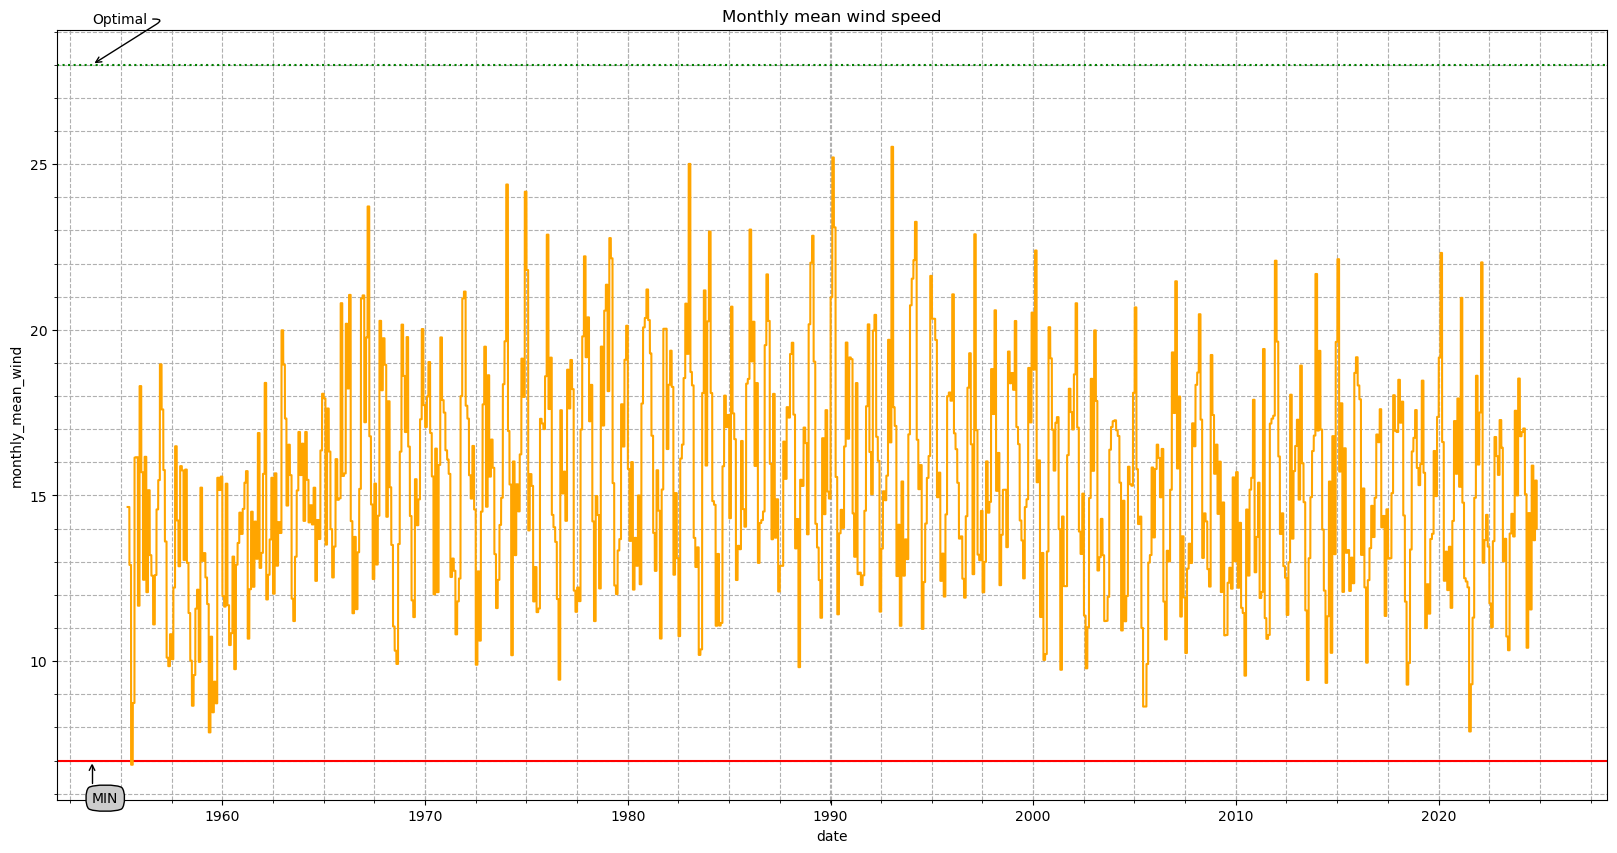

In [16]:
grid()
plt.title("Monthly mean wind speed")
sns.lineplot(data=dfws, x="date", y="monthly_mean_wind", color="orange")

### Convert Wind speed into Power generated

1 knoot = 0.51444 m/s

$P = 1/2 x ρ x A x v^3$

$P = Power (W)$

$ ρ = Density  (kg/m^3)$ 

$A = Swept Area  (m^2)$

$v = Wind Speed  (m/s)$


The standard(link is external) density of air is $1.225 kg/m^3$

The blade lenght is 50 m. The swept area of the turbine is: $A = π × r^2 = π x 50^2= 7854 m^2$

https://en.wikipedia.org/wiki/Knot_(unit)

https://www.e-education.psu.edu/emsc297/node/649

https://www.geeksforgeeks.org/wind-energy-formula/

https://www.ewea.org/wind-energy-basics/faq/#:~:text=How%20big%20is%20a%20wind,than%201%2C500%20average%20EU%20households.

https://mmpa.org/wp-content/uploads/2015/09/Swept-Area-Provided-by-Kid-Wind-PDF.pdf

In [17]:
print(max(dfws["wdsp"]))
# https://realpython.com/python-min-and-max/#calling-min-and-max-with-a-single-iterable-argument

63


In [18]:
dfws = dfws[dfws["wdsp"] > 7]
dfws = dfws[dfws["wdsp"] < 48]
# https://www.earthdatascience.org/courses/intro-to-earth-data-science/scientific-data-structures-python/pandas-dataframes/indexing-filtering-data-pandas-dataframes/

In [19]:
dfws["wdsp_ms"]= dfws["wdsp"]* 0.51444
dfws["power_kw"]=(0.5*1.225*7854*dfws["wdsp_ms"]**3)/1000
dfws

,date,wdsp,daily_mean_wind,monthly_mean_wind,wdsp_ms,power_kw
0,1955-05-01 01:00:00,11,19.434783,14.651351,5.65884,871.724464
1,1955-05-01 02:00:00,11,19.434783,14.651351,5.65884,871.724464
2,1955-05-01 03:00:00,8,19.434783,14.651351,4.11552,335.329020
3,1955-05-01 04:00:00,18,19.434783,14.651351,9.25992,3819.607118
4,1955-05-01 05:00:00,9,19.434783,14.651351,4.62996,477.450890
...,...,...,...,...,...,...
609283,2024-10-31 20:00:00,12,14.916667,15.448925,6.17328,1131.735442
609284,2024-10-31 21:00:00,13,14.916667,15.448925,6.68772,1438.902064
609285,2024-10-31 22:00:00,13,14.916667,15.448925,6.68772,1438.902064
609286,2024-10-31 23:00:00,14,14.916667,15.448925,7.20216,1797.153966


<Axes: title={'center': 'Power generated along the years'}, xlabel='date', ylabel='power_kw'>

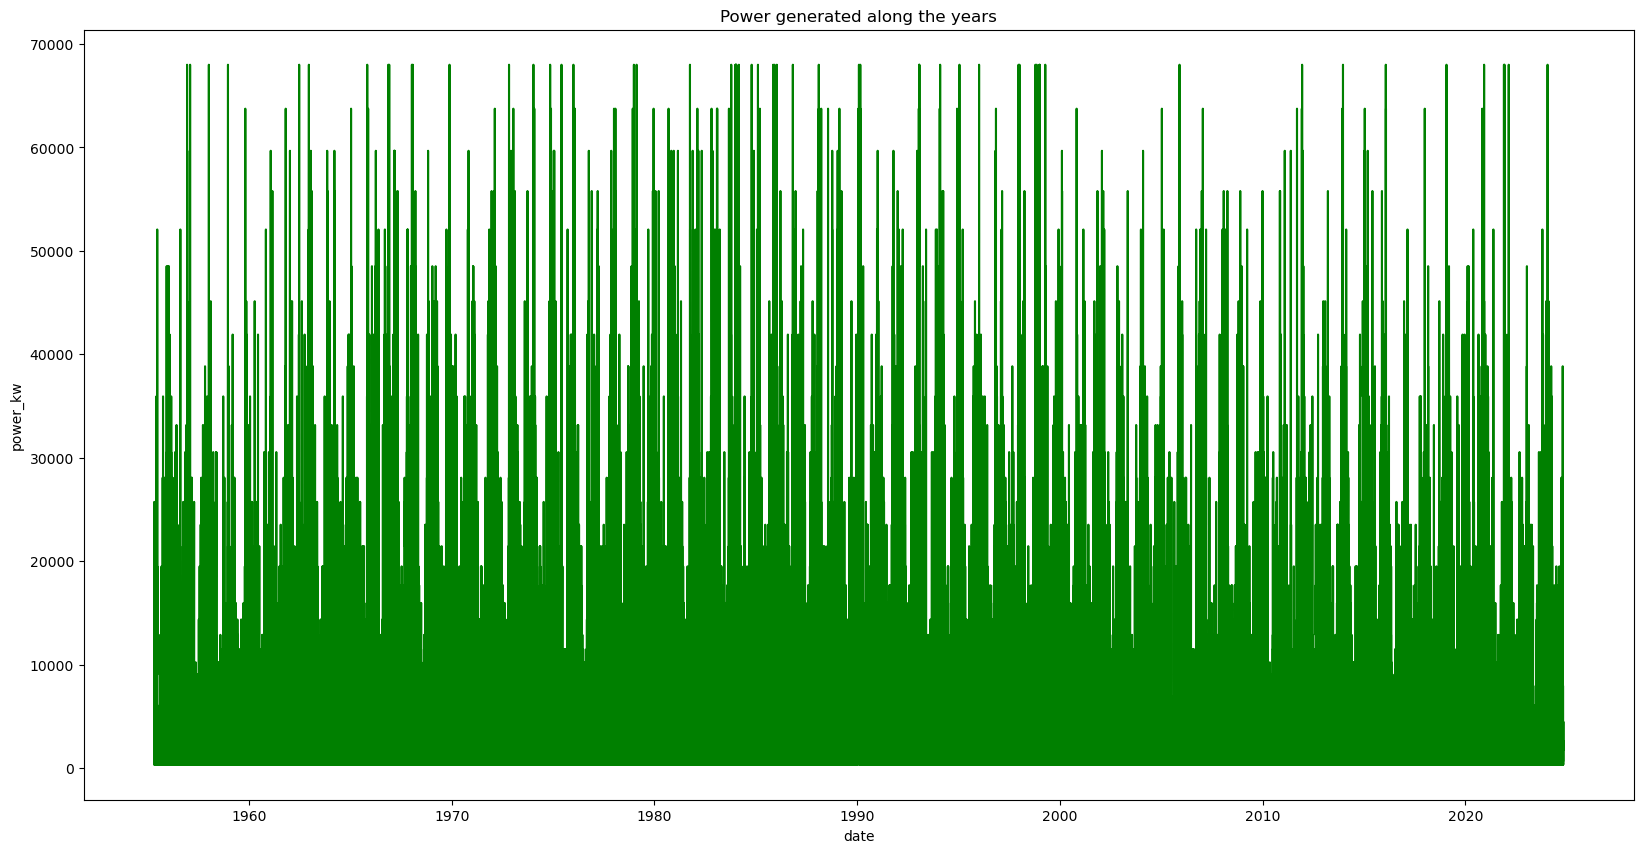

In [20]:
plt.title("Power generated along the years")
sns.lineplot(data=dfws, x="date", y="power_kw", color="green")

In [21]:
# Calculate the daily wind speed mean.
daily_mean_power = dfws.groupby(days)["power_kw"].transform("mean")

# Create a new column.
dfws["daily_mean_power"] = daily_mean_power

C:\Users\amand\AppData\Local\Temp\ipykernel_23652\4052702611.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfs = {year: dfws[df["date"].dt.year == year] for year in years}
C:\Users\amand\AppData\Local\Temp\ipykernel_23652\4052702611.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfs = {year: dfws[df["date"].dt.year == year] for year in years}
C:\Users\amand\AppData\Local\Temp\ipykernel_23652\4052702611.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfs = {year: dfws[df["date"].dt.year == year] for year in years}
C:\Users\amand\AppData\Local\Temp\ipykernel_23652\4052702611.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dfs = {year: dfws[df["date"].dt.year == year] for year in years}


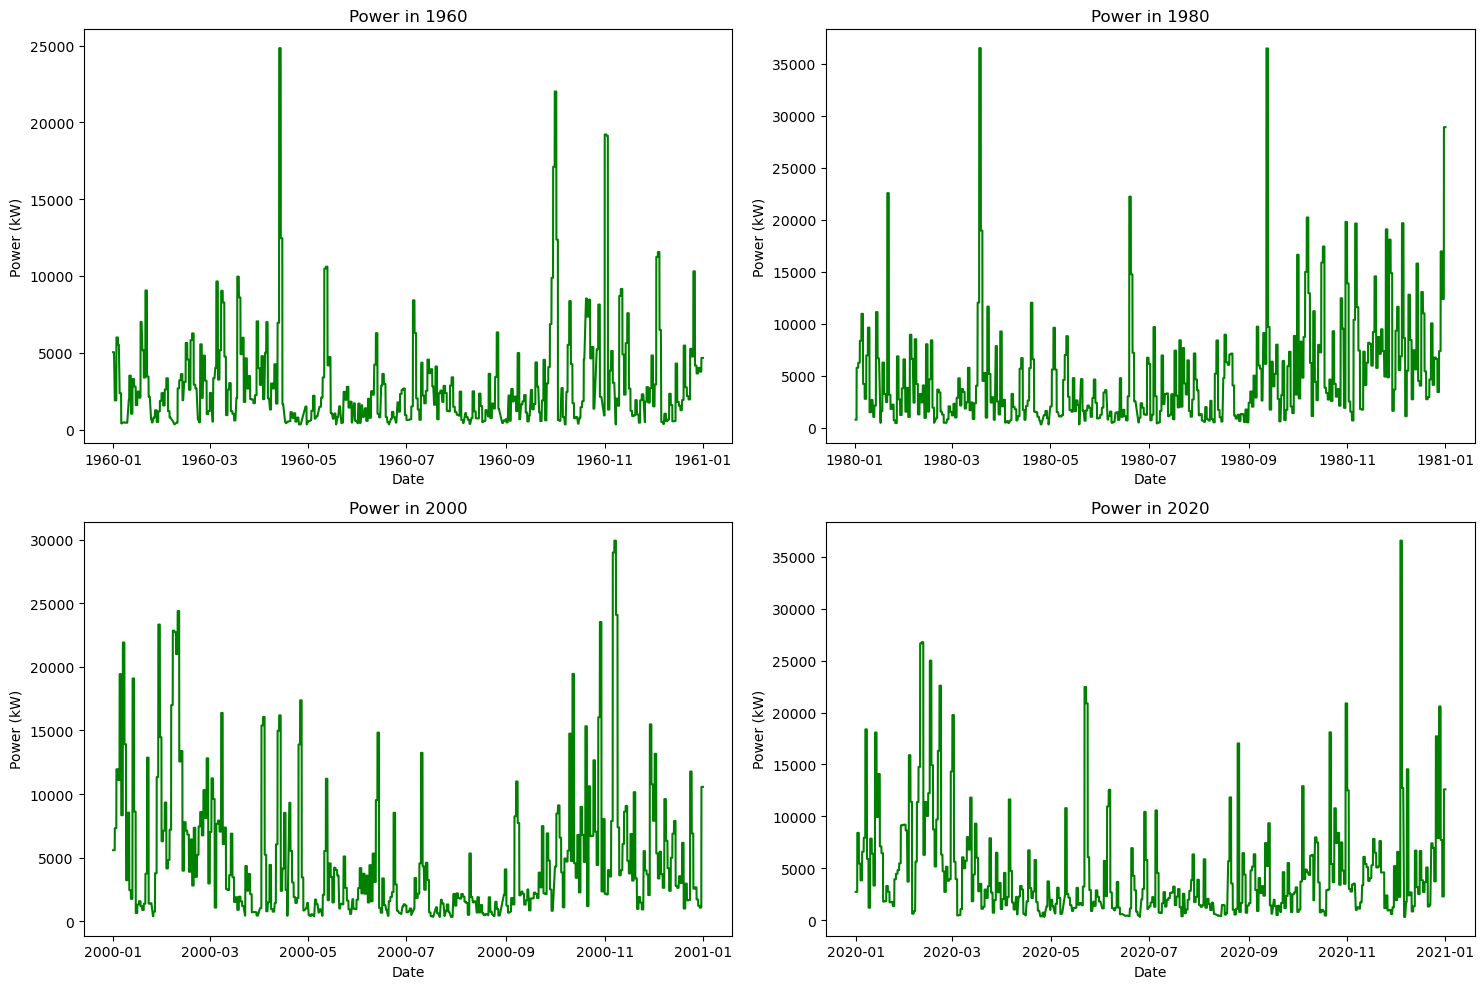

In [22]:
dfws["year"]= dfws["date"].dt.year

# Filter the DataFrame for the specified years
years = [1960, 1980, 2000, 2020]
dfs = {year: dfws[df["date"].dt.year == year] for year in years}

# Step 3: Create subplots for each year
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Create a line plot for each year
for ax, year in zip(axs.flatten(), years):
    sns.lineplot(x="date", y="daily_mean_power", data=dfs[year], ax=ax, color="green")
    ax.set_title(f"Power in {year}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Power (kW)")

# Adjust layout
plt.tight_layout()
plt.show()

# https://www.kaggle.com/code/vascodegama/automated-seaborn-plot-functions
# https://engineeringfordatascience.com/posts/matplotlib_subplots/#method-1-ravel
# https://napsterinblue.github.io/notes/python/viz/subplots/

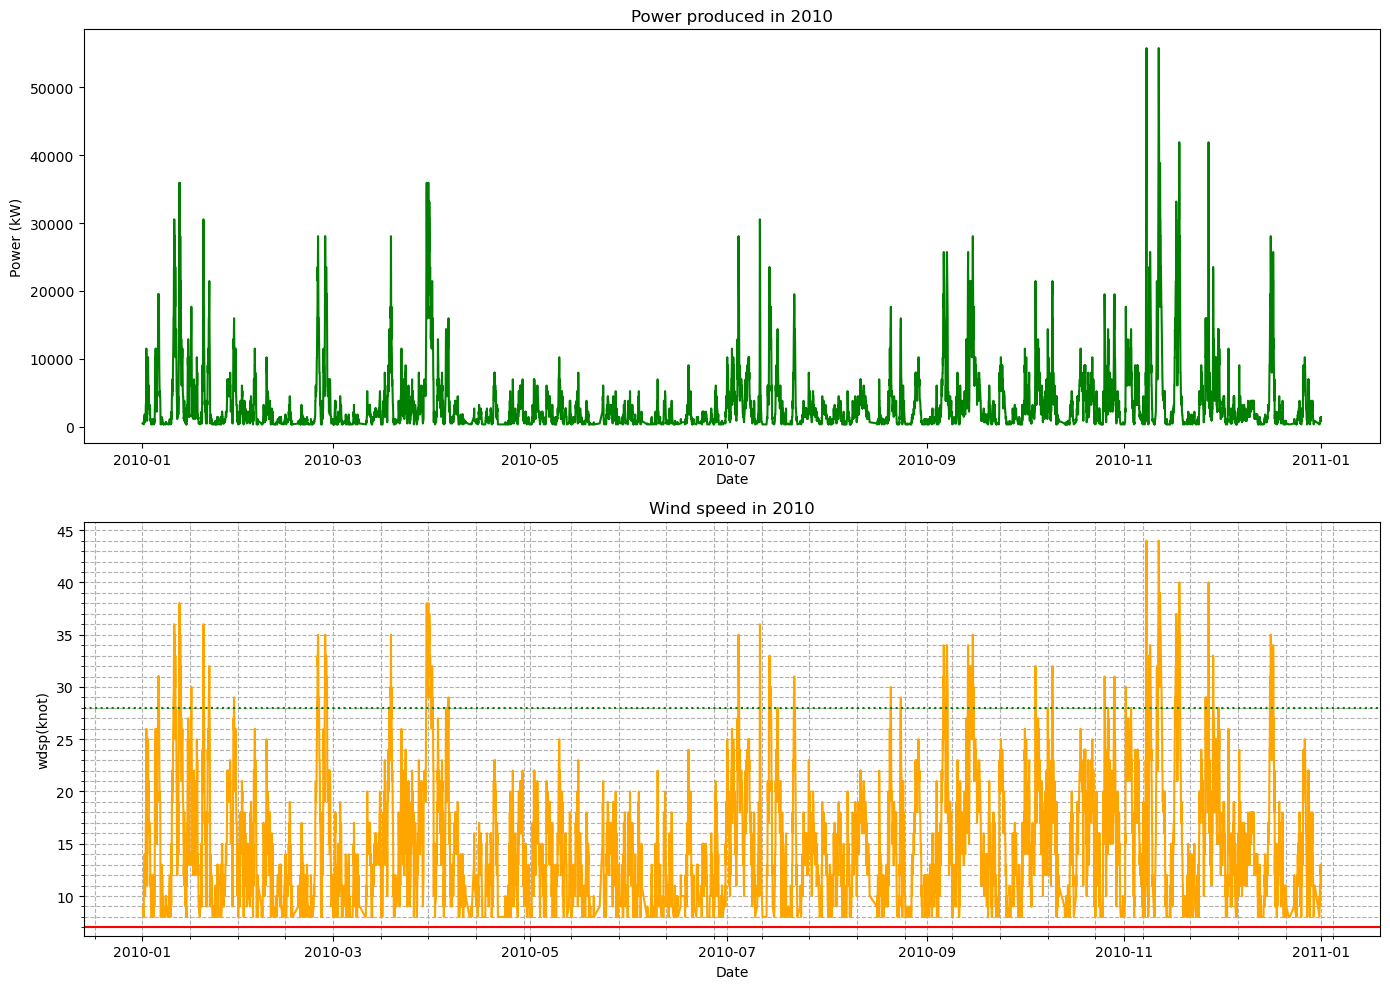

In [23]:
# Filter for rows where the year is 2010
df2010=dfws
df2010 = dfws[dfws["date"].dt.year ==2010]

# Create subplots for a cleaner visual
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

# Subplot for 'rain'
sns.lineplot(data=df2010, x="date", y="power_kw", ax=ax[0], color="green")
ax[0].set_title("Power produced in 2010")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Power (kW)")

# Subplot for 'temp'
sns.lineplot(data=df2010, x="date", y="wdsp", ax=ax[1], color="orange")
grid()
ax[1].set_title("Wind speed in 2010")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("wdsp(knot)")

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()
# https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

In [24]:
# Calculate the daily wind speed mean.
monthly_mean_power = dfws.groupby(months)["power_kw"].transform("mean")

# Create a new column.
dfws["monthly_mean_power"] = monthly_mean_power

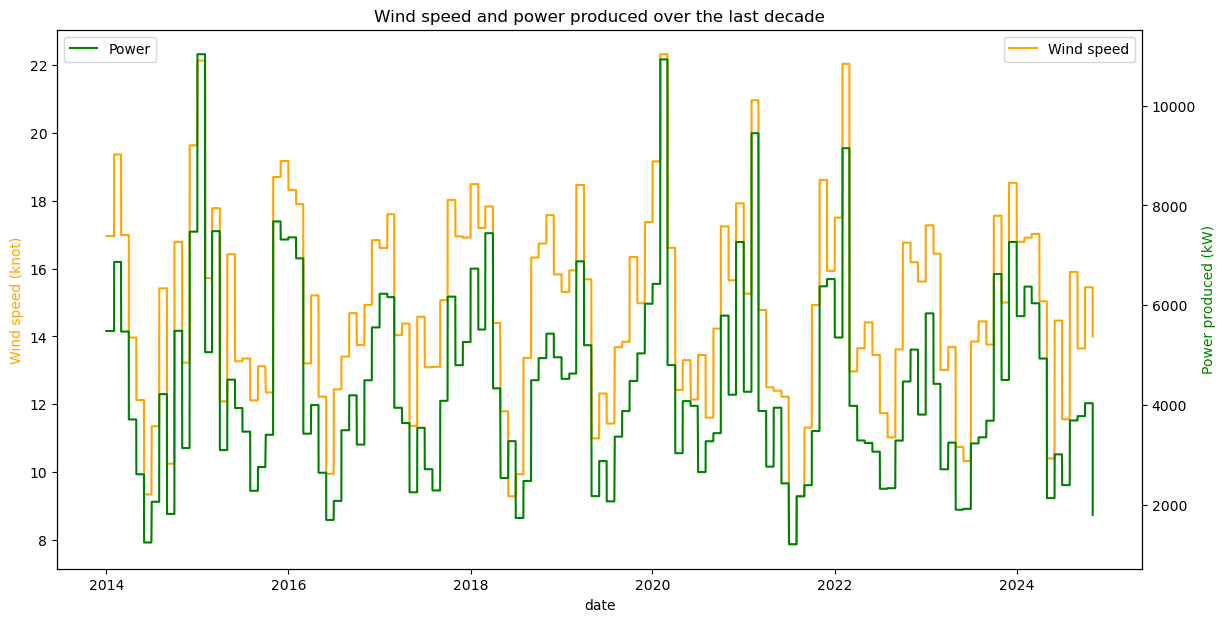

In [25]:
# Last decade years.
dfdec=dfws
dfdec = dfws[dfws["date"].dt.year >=2014]

# Step 2: Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot for 'rain'
sns.lineplot(x="date", y="monthly_mean_wind", data=dfdec, label="Wind speed", color="orange")
plt.ylabel("Wind speed (knot)", color="orange")

# Create a twin Axes sharing the x-axis for 'temp'
ax2 = plt.twinx()

# Plot for 'temp'
sns.lineplot(x="date", y="monthly_mean_power", data=dfdec, label="Power", color="green", ax=ax2)
ax2.set_ylabel("Power produced (kW)", color="green")

# Add titles and labels
plt.title("Wind speed and power produced over the last decade")
plt.xlabel("Date")
plt.legend(loc="upper left")
plt.show()


<Axes: title={'center': 'Monthly mean of Wind speed and power produced over the years'}, xlabel='date', ylabel='monthly_mean_wind'>

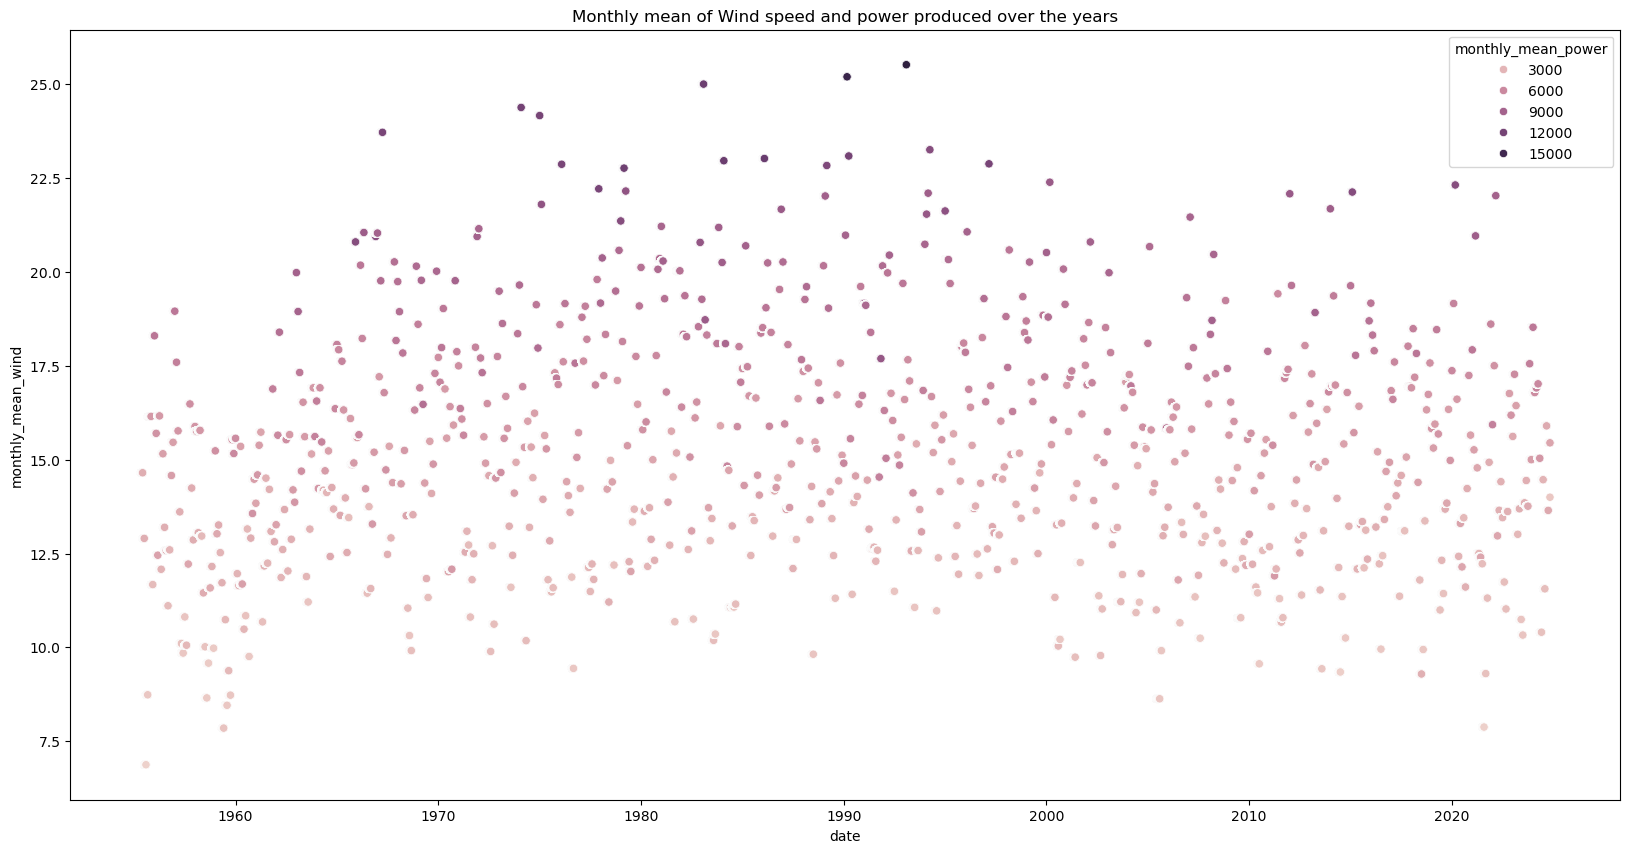

In [26]:
plt.title("Monthly mean of Wind speed and power produced over the years")
sns.scatterplot(x=dfws["date"],y=dfws["monthly_mean_wind"], hue=dfws["monthly_mean_power"])

## Correlation

Power correlation per month is: -0.0732098822623549


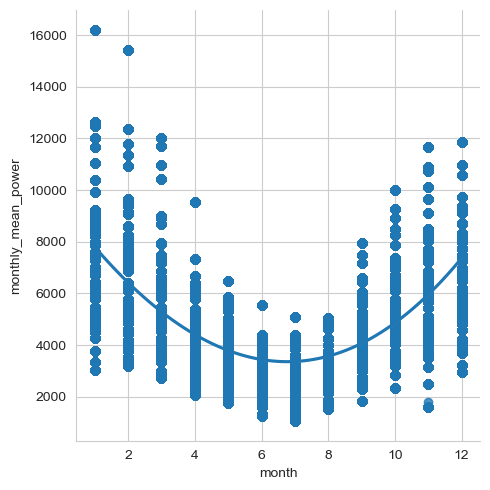

In [27]:
# Correlation between month and wind speed.
dfws["month"]= dfws["date"].dt.month

corrwind = dfws["month"].corr(dfws["monthly_mean_power"])
print (f"Power correlation per month is: {corrwind}")

sns.set_style("whitegrid")
sns.lmplot(x="month", y="monthly_mean_power", order=3, data=dfws)
plt.show()

Wind correlation per month is: -0.02036741333673797


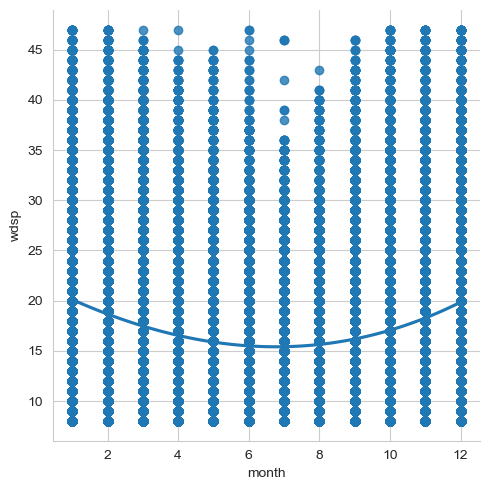

In [28]:
# Correlation between month and wind speed.
dfws["month"]= dfws["date"].dt.month

corrwind = dfws["month"].corr(dfws["wdsp"])
print (f"Wind correlation per month is: {corrwind}")

sns.set_style("whitegrid")
sns.lmplot(x="month", y="wdsp", order=3, data=dfws)
plt.show()

# Correlation between month and temperature.
#corrtemp = df["date"].corr(df["temp"])
#print(f"Temperature correlation per month is: {corrtemp}") 

## Scikit-Learn
---\

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
x = dfws[["power_kw", "daily_mean_power", "monthly_mean_power"]]
y = dfws['month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn#normalizing-&-splitting-the-data-whent
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
# https://scikit-learn.org/1.5/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
# https://www.askpython.com/python/examples/python-predict-function

Accuracy: 54.74%


In [30]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
x = dfws[['wdsp', 'monthly_mean_wind', 'daily_mean_wind']]
y = dfws['month']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.metrics import accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier()

# Train the model
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn#normalizing-&-splitting-the-data-whent
# https://www.datacamp.com/tutorial/k-nearest-neighbor-classification-scikit-learn
# https://scikit-learn.org/1.5/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py
# https://www.askpython.com/python/examples/python-predict-function

'''
clf = KNeighborsClassifier()

x = dfws[['month', "wdsp"]]
y = dfws['month']

clf = clf.fit(x, y)
print(clf.score(x,y))
'''

Accuracy: 52.26%


'\nclf = KNeighborsClassifier()\n\nx = dfws[[\'month\', "wdsp"]]\ny = dfws[\'month\']\n\nclf = clf.fit(x, y)\nprint(clf.score(x,y))\n'

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#x = dfws[['wdsp', 'monthly_mean_wind', 'daily_mean_wind', 'yearly_mean_wind']]
x = dfws[['wdsp']]
y = dfws['year']

model = LinearRegression()
model.fit(x, y)
model = LinearRegression().fit(x, y)

r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq}")
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")
#y_pred = model.intercept_ + np.sum(model.coef_ * x, axis=1)
#print(f"predicted response:\n{y_pred}")

# https://realpython.com/linear-regression-in-python/#simple-linear-regression-with-scikit-learn


coefficient of determination: 0.00039924065226737415
intercept: 1990.896120799237
coefficients: [-0.05865308]
predicted response:
[1990.25093696 1990.25093696 1990.42689619 ... 1990.13363081 1990.07497774
 1990.07497774]


C:\Users\amand\AppData\Local\Temp\ipykernel_23652\1859357568.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


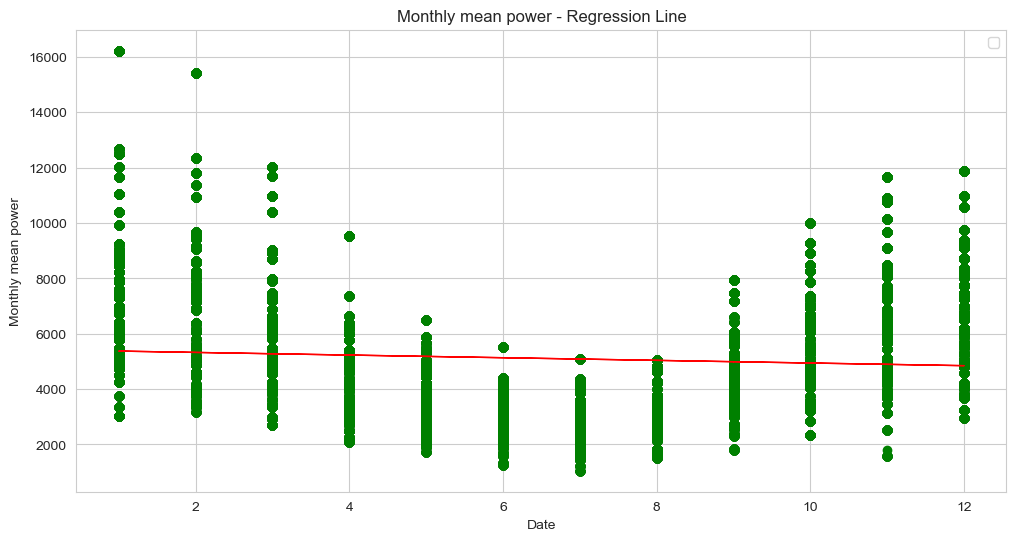

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = dfws[["month"]]
y = dfws["monthly_mean_power"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the model
y_pred = model.predict(X_test)

# Define figure size.
plt.figure(figsize=(12, 6))

# Plot the  values and regression line.
plt.scatter(X_test, y_test, color="green")
plt.plot(X_test, y_pred, color="red", linewidth=1)

# Add titles and labels.
plt.title("Monthly mean power - Regression Line")
plt.xlabel("Date")
plt.ylabel("Monthly mean power")
plt.legend()
plt.show()

# https://scikit-learn.org/1.5/auto_examples/linear_model/plot_ols.html
# https://scikit-learn.org/1.5/modules/generated/sklearn.model_selection.train_test_split.html
# https://realpython.com/train-test-split-python-data/

C:\Users\amand\AppData\Local\Temp\ipykernel_23652\286989728.py:27: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


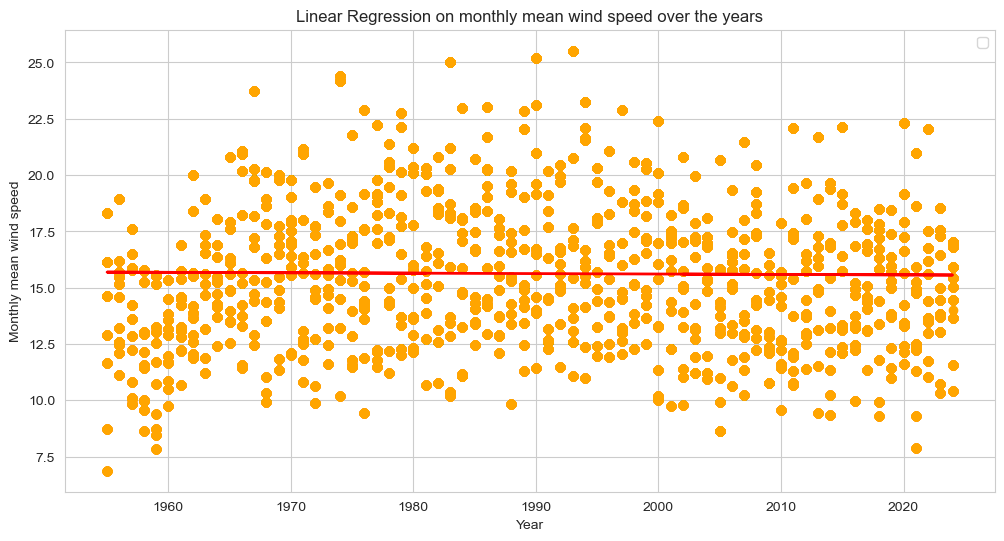

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = dfws[["year"]]
y = dfws["monthly_mean_wind"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions using the model
y_pred = model.predict(X_test)

# Plot the data and the regression line
plt.figure(figsize=(12, 6))

plt.scatter(X_test, y_test, color="orange")
plt.plot(X_test, y_pred, color="red", linewidth=2)

# Add titles and labels
plt.title("Linear Regression on monthly mean wind speed over the years")
plt.xlabel("Year")
plt.ylabel("Monthly mean wind speed")
plt.legend()

# Show the plot
plt.show()

## Prediction
Are the wind speeds likely to be the same in 10 years in the future? is there a trend in recorded wind speeds over the last few decades? 

In [ ]:
# Generate future dates.
#future_dates = pd.date_range(start="2024-11-02 00:00:00", periods=10*365, freq='D')
future_dates = pd.date_range(start="2024-11-02 00:00:00", periods=7*24, freq='H')

# Generate future wdsp values (e.g., by adding a small random variation around the mean)
mean_wdsp = dfws['daily_mean_wind'].mean()
std_wdsp = dfws['daily_mean_wind'].std()
future_wdsp = np.random.normal(loc=mean_wdsp, scale=std_wdsp, size=len(future_dates))

# Create a DataFrame for the synthetic data
future_df = pd.DataFrame({
    'date': future_dates,
    'daily_mean_wind': future_wdsp
})

# Append the synthetic data to the original DataFrame
#extended_dfws = pd.concat([dfws, future_df])

# Display the first few rows of the extended DataFrame
#extended_dfws

# Save the extended DataFrame to a new CSV file if needed
#extended_dfws.to_csv('extended_hly1575.csv', index=False)
future_df
#https://numpy.org/doc/2.0/reference/random/generated/numpy.random.normal.html

C:\Users\amand\AppData\Local\Temp\ipykernel_23652\4004256624.py:3: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start="2024-11-02 00:00:00", periods=7*24, freq='H')


,date,daily_mean_wind
0,2024-11-02 00:00:00,22.797192
1,2024-11-02 01:00:00,20.608551
2,2024-11-02 02:00:00,10.978258
3,2024-11-02 03:00:00,17.437157
4,2024-11-02 04:00:00,9.925603
...,...,...
163,2024-11-08 19:00:00,13.171950
164,2024-11-08 20:00:00,11.689052
165,2024-11-08 21:00:00,23.712054
166,2024-11-08 22:00:00,19.728661


<Axes: title={'center': 'Future wind speed'}, xlabel='date', ylabel='daily_mean_wind'>

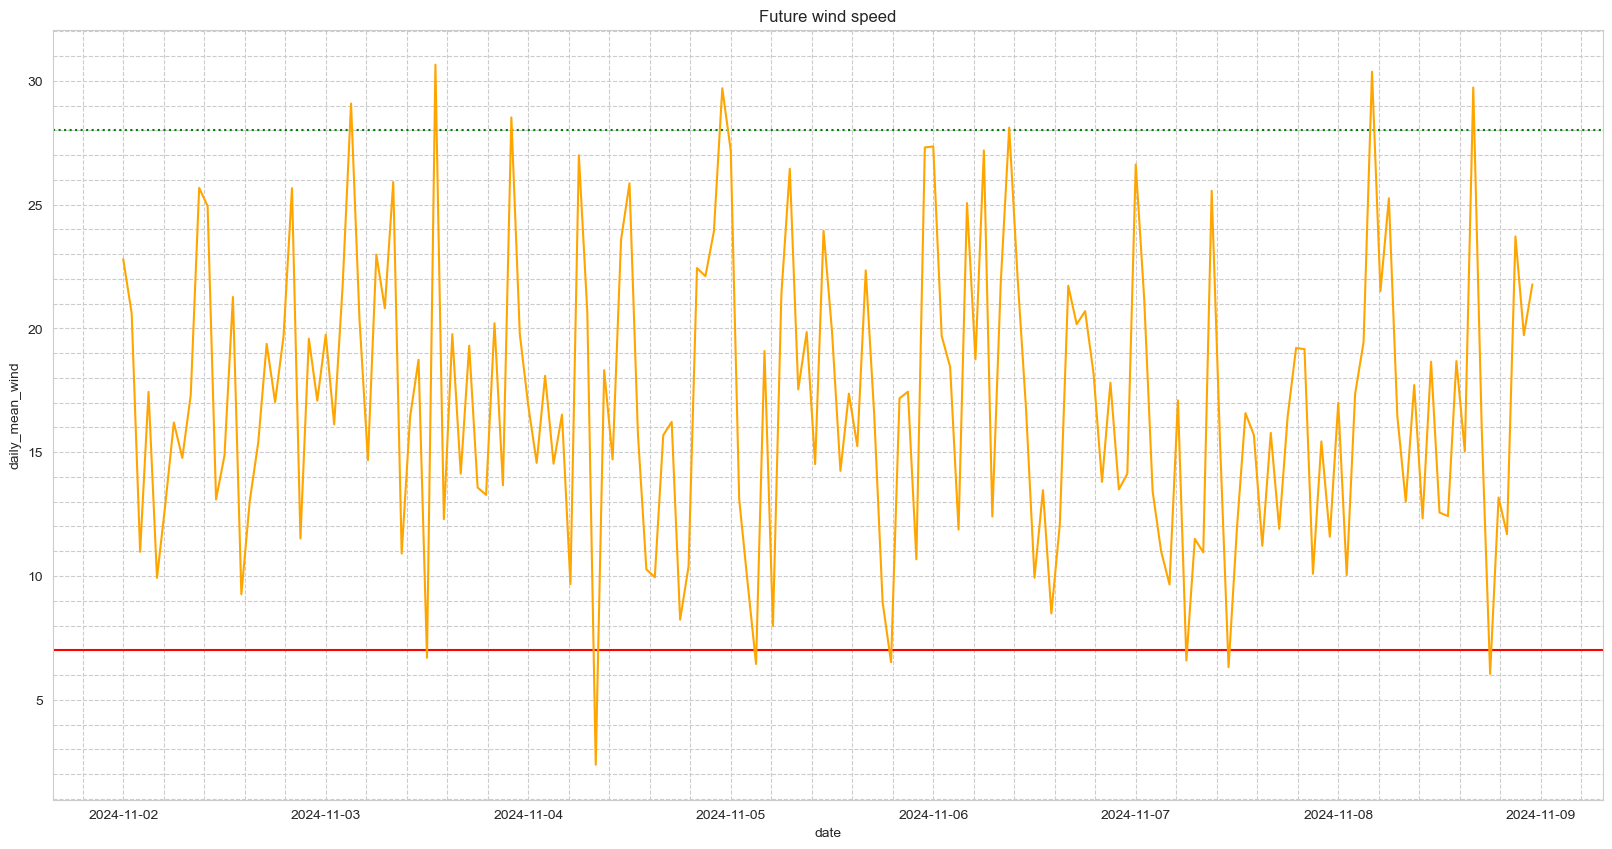

In [42]:
grid()
plt.title("Future wind speed")

#df_filtered = future_df[(future_df['date'] >= '2024-11-01') & (future_df['date'] <= '2034-11-01')]
#sns.lineplot(data=df_filtered, x="date", y="daily_mean_wind", color="purple")

sns.lineplot(data=future_df, x="date", y="daily_mean_wind", color="orange")

### Rain Temperature

In [36]:
dfrt=df[["date","rain", "temp"]]

dfrt["rain"] = pd.to_numeric(dfrt["rain"], errors="coerce")

# Drop the empty and 0 values.
dfrt = dfrt[dfrt["rain"] != " "]
dfrt = dfrt[dfrt["rain"] != 0]
dfrt = dfrt[dfrt["temp"] != " "]

C:\Users\amand\AppData\Local\Temp\ipykernel_23652\1574953982.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfrt["rain"] = pd.to_numeric(dfrt["rain"], errors="coerce")


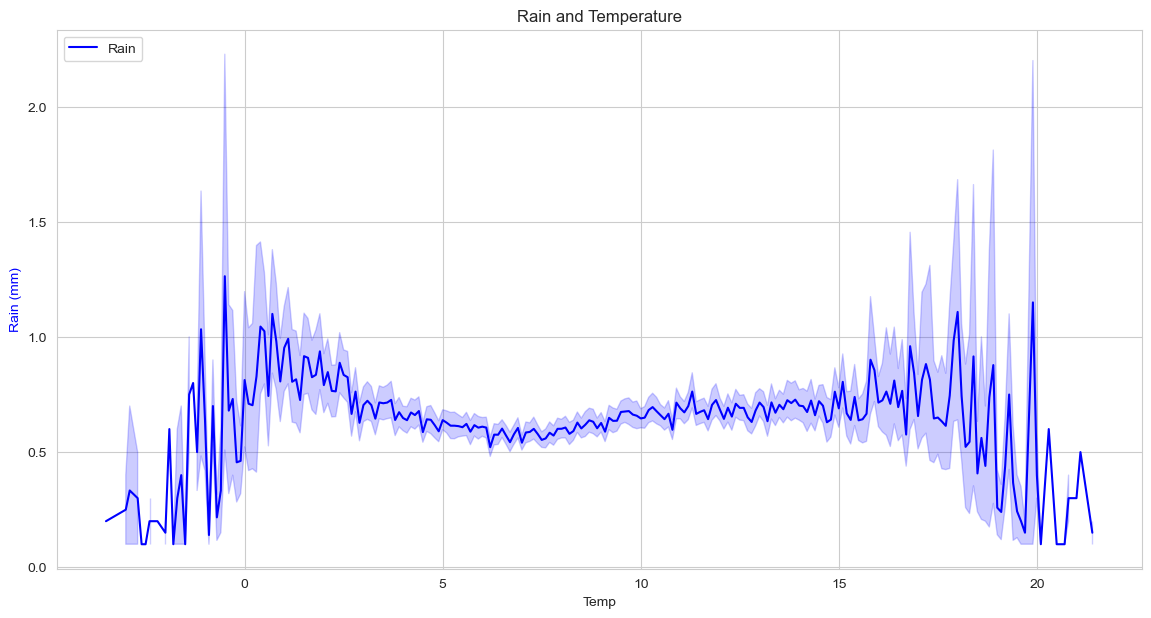

In [ ]:
# Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot.
sns.lineplot(x='temp', y='rain', data=dfrt, label='Rain', color='blue')

plt.ylabel('Rain (mm)', color='blue')

# Add titles and labels
plt.title('Rain and Temperature')
plt.xlabel('Temp')
plt.legend(loc='upper left')
plt.show()


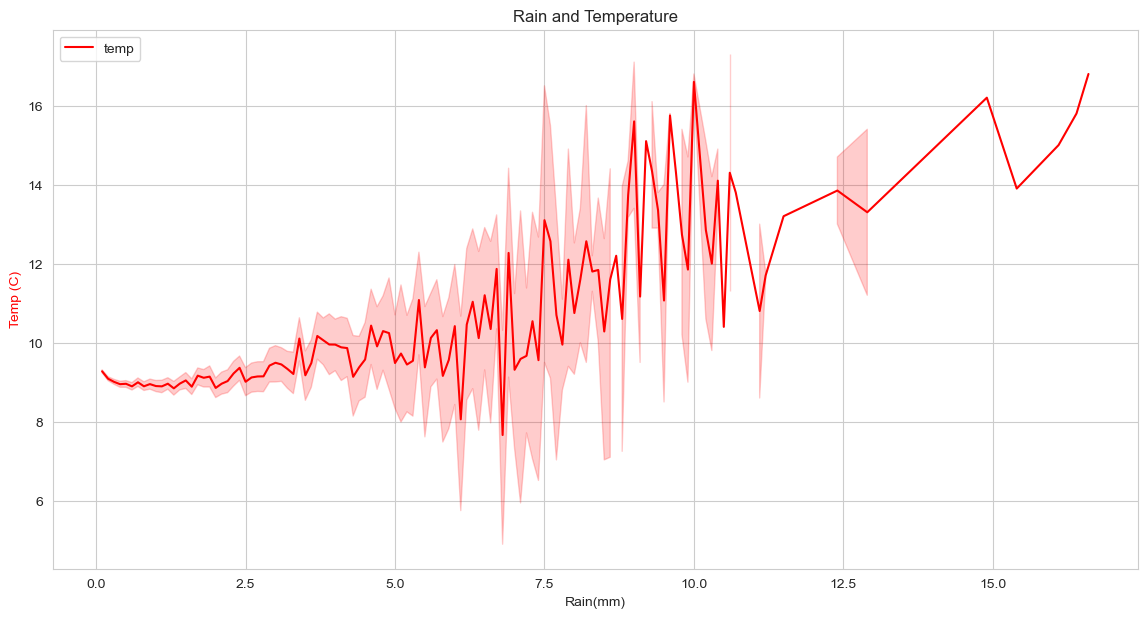

In [ ]:
#Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot
sns.lineplot(x='rain', y='temp', data=dfrt, label='temp', color='red')
plt.ylabel('Temp (C)', color='red')

# Add titles and labels
plt.title('Rain and Temperature')
plt.xlabel('Rain(mm)')
plt.legend(loc='upper left')
plt.show()


In [39]:
# Calculate the daily wind speed mean.
monthly_mean_rain = dfrt.groupby(months)["rain"].transform("mean")
monthly_mean_temp = dfrt.groupby(months)["temp"].transform("mean")

# Create a new column.
dfrt["monthly_mean_rain"] = monthly_mean_rain
dfrt["monthly_mean_temp"] = monthly_mean_temp

# Check
dfrt.head(3)

,date,rain,temp,monthly_mean_rain,monthly_mean_temp
5,1955-05-01 06:00:00,0.1,8.4,0.483448,8.049655
7,1955-05-01 08:00:00,0.1,9.2,0.483448,8.049655
8,1955-05-01 09:00:00,0.2,9.3,0.483448,8.049655


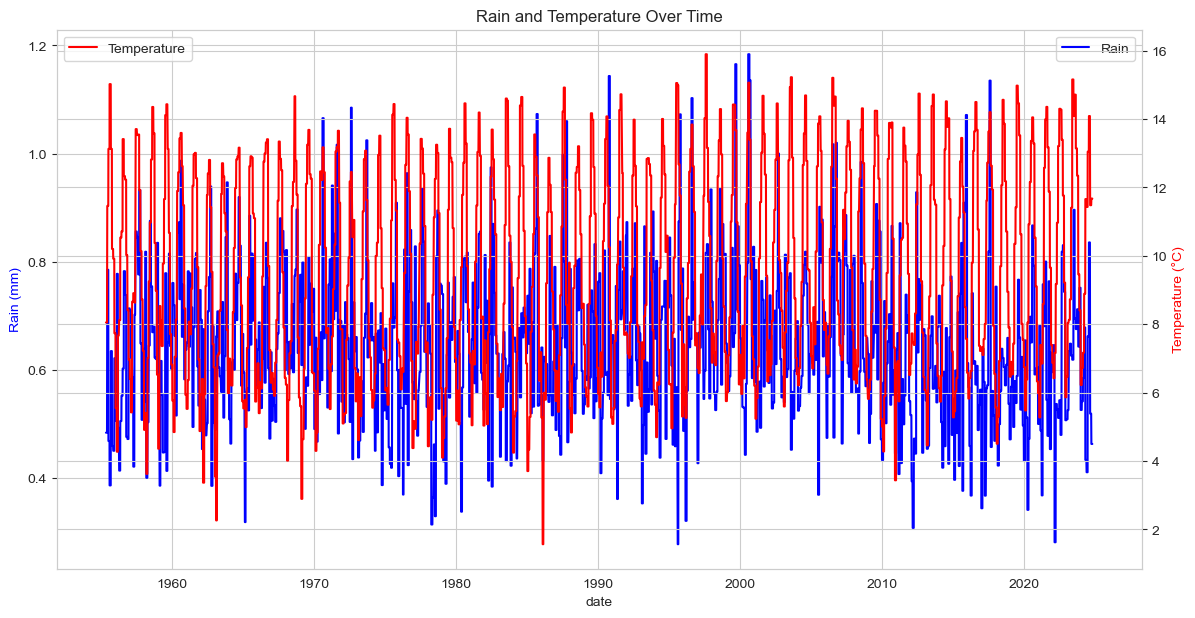

In [ ]:
# Plot the data using seaborn
plt.figure(figsize=(14, 7))

# Plot rain
sns.lineplot(x='date', y='monthly_mean_rain', data=dfrt, label='Rain', color='blue')
plt.ylabel('Rain (mm)', color='blue')

# Create a twin Axes sharing the x-axis for 'temp'
ax2 = plt.twinx()

# Plot for temperature
sns.lineplot(x='date', y='monthly_mean_temp', data=dfrt, label='Temperature', color='red', ax=ax2)
ax2.set_ylabel('Temperature (°C)', color='red')

# Add titles and labels
plt.title('Rain and Temperature Over Time')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.show()


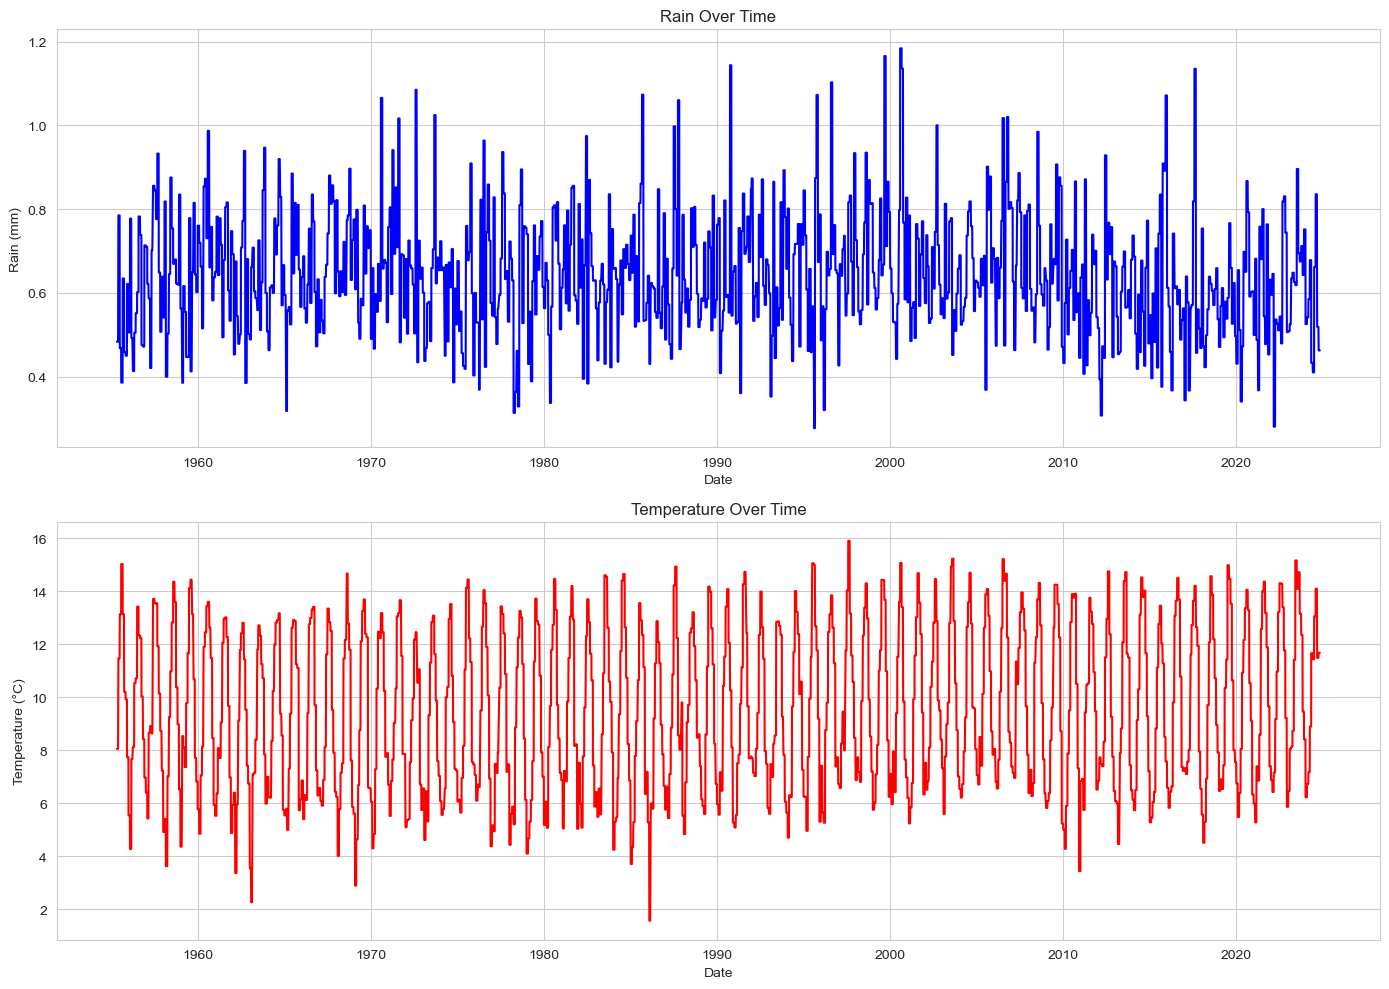

In [41]:
# Create subplots for a cleaner visual
fig, ax = plt.subplots(2, 1, figsize=(14, 10))

#sns.scatterplot(x='monthly_mean_temp', y='monthly_mean_rain', data=dfrt, color='blue')

# Subplot for 'rain'
sns.lineplot(x='date', y='monthly_mean_rain', data=dfrt, ax=ax[0], color='blue')
ax[0].set_title('Rain Over Time')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Rain (mm)')

# Subplot for 'temp'
sns.lineplot(x='date', y='monthly_mean_temp', data=dfrt, ax=ax[1], color='red')
ax[1].set_title('Temperature Over Time')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Temperature (°C)')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()